## Code for exercises, small projects or variations

In [ ]:
# Dichotomous search with indexing (Chapter 1) [Correct, as of 8.3.2023]

## Part 1. Indexing ecoli genome

### reading of file
file = open('files/ecoli.fa', 'r')
ecoli = ''
count = 0
for line in file:
    count += 1
    if (count > 1): # the first line contains the non-sequence header so we discard it 
        ecoli += line.replace("\n", "") # we string the newline character from the end of each line


### Creating a sort list of all k-mers in the genome 
k = 10
# note that position i is attached to kmer
kmers = [ecoli[i:i+k]+":"+str(i) for i in range(len(ecoli)-k+1)] 

dictkmers = {}

for k in kmers:
    kstring = k.split(":")[0]
    dictkmers[kstring] = ""

### Recasting the kmer list to a dictionary with kmers as keys and position list as values
for k in kmers:
    kstring = k.split(":")[0]
    dictkmers[kstring] = dictkmers[kstring]+","+str(k.split(":")[1])

list_of_kmers = list(dictkmers.keys()) # full list
list_of_kmers.sort()


In [ ]:
## Part 2. Dichotomous Search for k-mers [Correct, as of 8.3.2023]

### Using time to measure time of execution
import time
start_time = time.time()

### Pattern search

pattern = 'AAAAAACGAG' # non-mer
pattern = 'ATGCACGACC' # existing

matches = 0

iter = 0
min = 1
max = len(list_of_kmers)

midpoint = int((max+min)/2)

import math 

while iter <= math.log2(len(list_of_kmers)) + 1:
    kmer = list_of_kmers[midpoint]
    iter += 1
    if (pattern == kmer): # case is a success
        matches = len(dictkmers[kmer][1:].split(",")) # number of matches equals length of positions
        positions = dictkmers[kmer][1:].split(",")
        print("Pattern", pattern," matched ", matches, " times in position(s):", positions)
        break
    if (pattern > kmer):
        min = midpoint
        midpoint = int((max+min)/2)
    if (pattern < kmer ):
        max = midpoint
        midpoint = int((max+min)/2)
if (matches == 0):
    if (pattern == list_of_kmers[0]):
        kmer = list_of_kmers[0]
        matches = len(dictkmers[kmer][1:].split(",")) # number of matches equals length of positions
        positions = dictkmers[kmer][1:].split(",")         
        print("Pattern", pattern," matched ", matches, " times in position(s):", positions)
    if (pattern == list_of_kmers[-1]):
        kmer = list_of_kmers[-1]
        matches = len(dictkmers[kmer][1:].split(",")) # number of matches equals length of positions
        positions = dictkmers[kmer][1:].split(",")         
        print("Pattern", pattern," matched ", matches, " times in position(s):", positions)
    else:
        print("No matches found")

print("--- %s seconds ---" % (time.time() - start_time))


Notice how the above strategy of _dichotomous search_ is actually one order of magnitude faster than a regular expression search performed with a python generator function

In [ ]:
# Pattern search with a generator function
import re
import regex

import time
start_time = time.time()

keystring = 'ATGCACGACC'
# generator function with re.finditer()
dictkmers[keystring] = [m.start() for m in re.finditer(f'(?={keystring})', ecoli)]

matches = len(dictkmers[keystring]) 
print(keystring, " was found ", matches, " times at positions:", dictkmers[keystring])
print("--- %s seconds ---" % (time.time() - start_time))


In [ ]:
## Clustering of a dataset 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

# Load the dataframe and assign values/labels
df = pd.read_csv('files/GCContent_simple.csv')
dvalues = df['GCContent'].values.reshape(-1,1)
dlabels = list(df['Genome'])

# Calculate the distances
distances = pdist(dvalues)

# Convert the pairwise distances into a square distance matrix
distance_matrix = squareform(distances)

# Calculate the linkage matrix using Ward's method
linkage_matrix = linkage(distance_matrix, method='ward')

# Plot the dendrogram
sns.set_style('white')
dendrogram(linkage_matrix, labels=dlabels, color_threshold=0, orientation='left')

# Show the plot
plt.show()

In [ ]:
# PSSM Search

# read file
import sys
import re
import math
import itertools
import numpy as np

#threshold=raw_input("Provide Score Threshold: ")
threshold=float(sys.argv[3])

pssm=np.genfromtxt(sys.argv[2], names=True, delimiter='\t', dtype=None)
size=len(pssm)
maxscore=0

for k in range(size):    
    maxscore=maxscore+max(pssm[k][1],pssm[k][2],pssm[k][3],pssm[k][4])

f = open(sys.argv[1],"r")
seq = ""
total = 0

p=re.compile(">(.+)")

for line in f:
	x=p.search(line)
	if x:
		name=x.group(1)
	if x == None:
		length=len(line)
		total=total+length
		seq=seq+line[0:length]
		score=[0 for x in range(len(seq)-size)];

		for i in range(len(seq)-size):
			pattern=""
			for j in range(size):
				pattern=pattern+seq[i+j]
				score[i]=score[i]+pssm[seq[i+j]][j]
			
			if score[i]/maxscore >= threshold:
				print name,"\t",i+1,"\t",pattern,"\t",score[i]/maxscore
		
		seq = ""
		total = 0	

In [ ]:
### A divide-and-conquer with binary splits for the location of parity transitions (NOT WORKING)

def dcParity(genomefile, type, window, resolution):
    
    import matplotlib.pyplot as plt
    import regex as re  

    # Reading of the sequence
    f = open(genomefile, 'r')
    seq = ""
    total = 0
    A=T=G=C=[]
    times=0;
    for line in f:
        x=re.match(">", line)
        if x == None:
            length=len(line)
            total=total+length
            seq=seq+line[0:length-1]
    f.close()

    # Parity Calculations (for plotting purposes)
    x = []
    parity = []
    step = int(window/10)
    times = int(len(seq)/step);
    for i in range(times):
        x.append(i*step)
        DNA=seq[i*step:i*step+window]
        A=DNA.count("A")
        T=DNA.count("T")
        C=DNA.count("C")
        G=DNA.count("G")
        if type == "AT":
            parity.append(float(A-T)/float(A+T))
        if type == "GC":
            parity.append(float(G-C)/float(G+C))

    # Main part that performs the identification of transitions
    transitions = []
    grange = len(parity)
    start = 0
    end = len(parity)-1
    midpoint  = int(len(parity)/2)
    while (grange > resolution):
        print(midpoint, grange, resolution)
        if (parity[start]*parity[midpoint] < 0):
            grange = midpoint - start 
            midpoint = int(midpoint/2)
        if (parity[midpoint]*parity[end] < 0):
            grange = end - midpoint
            midpoint = end-int(midpoint/2)
    
    transitions.append(midpoint)
        
    # Plotting Parity and Predicted Transitions
    plt.plot(x, parity, color= "green", linewidth = 3.0)
    plt.axhline(y = 0, color = 'grey', linewidth = 2.0)

    # plotting vertical lines at Ori and Ter
    for site in transitions:
        plt.axvline(x = site, color = 'black')

    #plt.scatter(x, parity, color= "green")

    # x-axis label
    plt.xlabel('Genome Coordinates')
    # frequency label
    plt.ylabel('Relative Difference')
    # plot title
    plt.title('Parity')
    # showing legend
    #plt.legend()

    # function to show the plot
    plt.show()

    return(transitions)

### Scrapbook
#### Bits of code to use for help

In [ ]:
print(list_of_kmers[1:100])

In [ ]:
print(kmers[0:10])
list_of_kmers.count('AAAAAAAAAC')

print(ecoli[:1000])

keystring = 'AAAAAAAAAC'
matches = re.findall(keystring, str(ecoli))
print(matches)

positions = [m.start() for m in re.finditer(f'(?={keystring})', ecoli)]
print(positions)

#string='atha'
#[m.start() for m in re.finditer(f'(?={string})', 'athathaathan')]

    

In [ ]:
# Gibbs Sampling to locate a motif in a set of sequences
# code
sequences = []
with open ('files/motifs_in_sequence.fa') as file:
    for line in file:
        sequences.append(line.strip()) # 50 sequences as elements of a list. 100 bases each sequence
    

##Gibbs sampler##
import random
import numpy as np

def Gibbs_sampler(sequences,k): #k is the length of the motif, sequence is a list with the sequences
    
    dictionary = {'A':0,
                  'T':1,
                  'C':2,
                  'G':3}
    
    column_sum = len(sequences) #number of rows (50) or number of sequences
    length = len(sequences[0]) #number of columns or number of nucleotides in seq
    Imax = 1.8*k #threshold of I
    
    pwm = np.zeros([4,k]) # A,T,C,G X len(motif)
    
    for seq in sequences:
        rand_start = random.randint(0, length-k) #pick a random nucleotide from each sequence
        motif = seq[rand_start:rand_start+k] #and take substring as the motif
       
        lst = enumerate(motif) #finding the index of each nucleotide in the motif to access the correct column
                               #and using the dictionary to access the correct row 
        for i in lst: #making the first random pwm
            pwm[dictionary[i[1]],i[0]]+=1
            
    pwm = pwm/column_sum
    
    information = np.zeros([1,k])
    count=0
    while (np.sum(information)) < Imax: #while information_content of the pwm 
        motives=[]                      #is less than the threshold
        
        information_old = np.sum(information) #keeping the previous value of information contect
                                             #to check convergence in case the theshold 
        for row in range (column_sum):                #is never reached
            maxx=0
            rand_seq = random.randint(0, column_sum-1) #pick a random index - sequence
            seq = sequences[rand_seq]               
            for i in range(len(seq)-k):   #take each k-mer from the sequence 
                score = 0
                substring = seq[i:i+k]
                lst = enumerate(substring)
                
                for j in lst:                         #scoring each k-mer based on the pwm
                    score+=pwm[dictionary[j[1]],j[0]]   #keeping the motif with the highest score
                                                         #from each sequence
                if score > maxx:  
                    maxx = score
                    motif = substring
                    
            motives += [motif] #keep all the motifs with the highest score in the list motives
        
        pwm = np.zeros([4,k]) # A,T,C,G X len(motif) 
        
        for elem in motives: 
            lst = enumerate(elem)
            for i in lst:         #making the new pwm
                pwm[dictionary[i[1]],i[0]]+=1
                 
        pwm = pwm/column_sum
        
        information = np.zeros([1,k]) #computing the information of each position
        for i in range(k):
            information[0,i] = 2-abs(sum([elem*np.log2(elem) for elem in pwm[:,i] if elem > 0]))
            

        if abs(information_old - np.sum(information)) <= 0.5: #ckecking convergence 
            count+=1
            if count == 10: #if the difference of the information content is less or equal to 0.5
                break       #for consecutive 10 iterations then break
        else:
            count=0
    
    max_index_col = np.argmax(pwm, axis=0) #extracting the motif according to the   
                                           #highest frequency of each nucleotide in each position
    motif=''
    for values in max_index_col:
        for keys in dictionary.keys():
            if values == dictionary[keys]:
                motif+= keys
        
    return pwm,information,motif


#repeat the algorithmm 100 times for each k (3 to 7) and keep the pwm and motif with the highest infromation_content
#this process takes approximately 4min (in my computer)
    
####100-cycled GIbbs#####
for k in range (3,8):
    highest_info = 0
    for i in range (100):
        summ=0
        pwm, information_content,motif = Gibbs_sampler(sequences,k)
        summ+=np.sum(information_content)
        if summ > highest_info:
            highest_info = summ
            pwm_ret = pwm
            motif_ret = motif
        
    print('\nThe information content of the motif divided by it\'s length is:',highest_info/k) #divide by length to normalize and compare among other k
    print('The pwm of the motif is:\n',pwm_ret)
    print('The motif is:',motif_ret)



#To find the motifs for each k with the highest information content i have to repeat gibbs sampler many times because of the randomness that takes place
#The motif that returns the highest scaled information content is GAT (k = 3, I/k = 1.9528 or 2!) but i think that the motif that we are looking for
#is the motif GATA (k=4, I/k = 1.857) which contains GAT and is contained in all the longer found motifs.
#(Also we know the existence of the GATA transcription factors and indeed GATA is part of these binding sites)
#Sometimes the algorithm returns other 3-mers (eg ATG,GGC,AAG) with high information content as well but it
#is noted that GATA is returned almost in every repetition of the 100-cycled Gibbs which means that it may be the only 4-mer motif with so high information content.
#Finally i have to report that the threshold that i chose for checking convergence may not be the best choice and should be stricter
#Either way i kept this threshold because otherwise i would have made the algorithm a lot slower (is already slow though :P).

In [ ]:
"""
==============================
This is a dynamic programming algorithm for finding the optimal alignment of
two strings.
Example
-------
    >>> x = "GATTACA"
    >>> y = "GCATGCU"
    >>> print(nw(x, y))
    G-ATTACA
    GCA-TGCU
"""

import numpy as np

def nw(x, y, match = 1, mismatch = 1, gap = 1):
    nx = len(x)
    ny = len(y)
    # Optimal score at each possible pair of characters.
    F = np.zeros((nx + 1, ny + 1))
    F[:,0] = np.linspace(0, -nx * gap, nx + 1)
    F[0,:] = np.linspace(0, -ny * gap, ny + 1)
    # Pointers to trace through an optimal aligment.
    P = np.zeros((nx + 1, ny + 1))
    P[:,0] = 3
    P[0,:] = 4
    # Temporary scores.
    t = np.zeros(3)
    for i in range(nx):
        for j in range(ny):
            if x[i] == y[j]:
                t[0] = F[i,j] + match
            else:
                t[0] = F[i,j] - mismatch
            t[1] = F[i,j+1] - gap
            t[2] = F[i+1,j] - gap
            tmax = np.max(t)
            F[i+1,j+1] = tmax
            if t[0] == tmax:
                P[i+1,j+1] += 2
            if t[1] == tmax:
                P[i+1,j+1] += 3
            if t[2] == tmax:
                P[i+1,j+1] += 4
    # Trace through an optimal alignment.
    i = nx
    j = ny
    rx = []
    ry = []
    while i > 0 or j > 0:
        if P[i,j] in [2, 5, 6, 9]:
            rx.append(x[i-1])
            ry.append(y[j-1])
            i -= 1
            j -= 1
        elif P[i,j] in [3, 5, 7, 9]:
            rx.append(x[i-1])
            ry.append('-')
            i -= 1
        elif P[i,j] in [4, 6, 7, 9]:
            rx.append('-')
            ry.append(y[j-1])
            j -= 1
    # Reverse the strings.
    rx = ''.join(rx)[::-1]
    ry = ''.join(ry)[::-1]
    return '\n'.join([rx, ry, str(F[nx,ny])])
    
x = "GATTACA"
y = "GCATGCU"
print(nw(x, y))
# G-ATTACA
# GCA-TGCU

np.random.seed(42)
x = np.random.choice(['A', 'T', 'G', 'C'], 50)
y = np.random.choice(['A', 'T', 'G', 'C'], 50)

print(nw(x, y, gap = 0))
# ----G-C--AGGCAAGTGGGGCACCCGTATCCT-T-T-C-C-AACTTACAAGGGT-C-CC-----CGT-T
# GTGCGCCAGAGG-AAGT----CA--C-T-T--TATATCCGCG--C--AC---GGTACTCCTTTTTC-TA-

print(nw(x, y, gap = 1))
# GCAG-GCAAGTGG--GGCAC-CCGTATCCTTTC-CAAC-TTACAAGGGTCC-CCGT-T-
# G-TGCGCCAGAGGAAGTCACTTTATATCC--GCGC-ACGGTAC-----TCCTTTTTCTA

print(nw(x, y, gap = 2))
# GCAGGCAAGTGG--GGCAC-CCGTATCCTTTCCAACTTACAAGGGTCCCCGTT
# GTGCGCCAGAGGAAGTCACTTTATATCC-GCGCACGGTAC-TCCTTTTTC-TA
# GCAG-GCAAGTGG--GGCAC-CCGTATCCTTTC-CAAC-TTACAAGGGTCC-CCGT-T-
# G-TGCGCCAGAGGAAGTCACTTTATATCC--GCGC-ACGGTAC-----TCCTTTTTCTA

print(nw(x, y, gap = 2))
# GCAGGCAAGTGG--GGCAC-CCGTATCCTTTCCAACTTACAAGGGTCCCCGTT
# GTGCGCCAGAGGAAGTCACTTTATATCC-GCGCACGGTAC-TCCTTTTTC-TA

### FASTA Pseudocode

### FASTA Pseudocode example

'''
fastaComparison(Q,S):  
    q=len(Q)  
    s=len(S)  
    k=2 # choice of k  
    #  
    S=[0 for i in range(1-q,s-1)] # creation of S  
    kmersQ = indexKmers(Q, k)  
    kmersS = indexKmers(S, k)  
    S = []  
    for i in kmersQ:  
        m = kmersQ[i]  
        n = kmersQ[i]  
        if (len(m) == 0):  
            m = 0  
        if (len(n) == 0):  
            n = 0  
        for mmer in m:  
            for nmer in n:  
                p = m[mmer] - n[nmer]  
                S[p] += 1   
    return S  
'''  

In [ ]:
### FASTA Implementation

def indexKmers(S, k):
    kmers = {}
    lenseq = len(S)
    for i in range(lenseq - k + 1):
        substring = S[i:i+k]
        if substring in kmers:
            kmers[substring].append(i)
        else:
            kmers[substring]=[i]
    
    return(kmers)

mykmers = list(indexKmers("ATTAGACACACAGTTTT", 2))

print(mykmers[1])


In [ ]:

def fastaComparison(Q, S, k, lenlimit, gaplimit):
    import re
    # Q will be the query, S will be the target
    q=len(Q)
    s=len(S)    
    #k=2 # choice of k

    # q will be the 'negative index', s will be the 'positive index'   
    F=[0 for i in range(1-q,s-1)] # creation of Diagonal Scores List
    M=["" for i in range(1-q,s-1)] # creation of Matches list
    # Running kmers indexing for Q, S
    kmersQ = indexKmers(Q, k)  
    kmersS = indexKmers(S, k)

    for i in kmersQ:  
        m = kmersQ[i]  
        n = kmersS[i]
        if (len(m)!=0 and len(n)!=0):
            for j in m:
                for l in n: 
                    p = l - j 
                    F[p] += 1
    
   
    matchedquery = []
    matchedsequence = []

    for d in range(1-q,s-1):
        if F[d] == (q - k + 1):
            matchedquery = Q
            positions = [match.start() for match in re.finditer(matchedquery, S)] 
            matchedsequence = S[positions[0]:positions[0]+q]
            print("Full match found at S in position","=",positions,"\n",matchedquery,"\n",matchedsequence)
        if F[d] >= lenlimit:
            print(d, F[d])
            matchedquery = Q
            positions = [match.start() for match in re.finditer(matchedquery, S)] 
            matchedsequence = S[positions[0]:positions[0]+F[d]+1]
            print("Partial match found at S in position","=",positions,"\n",matchedquery,"\n",matchedsequence)
    return(F)  

print(fastaComparison('TCATTTTCCCACATTTT','ATCAGGCACATCATTTT', 2, 3, 2))


### Appendix
#### Bits of code that can be useful

In [ ]:
# the following line searches a substring on a longer string and records ALL positions where it is found
# and stores them in a list
import re
import regex

import time
start_time = time.time()

keystring = 'ATGCACGACC'
dictkmers[keystring] = [m.start() for m in re.finditer(f'(?={keystring})', ecoli)]

print(keystring, dictkmers[keystring])
print("--- %s seconds ---" % (time.time() - start_time))

# Sorting a dictionary by key value
#sorted_dictkmers = {key: value for key, value in sorted(dictkmers.items())}


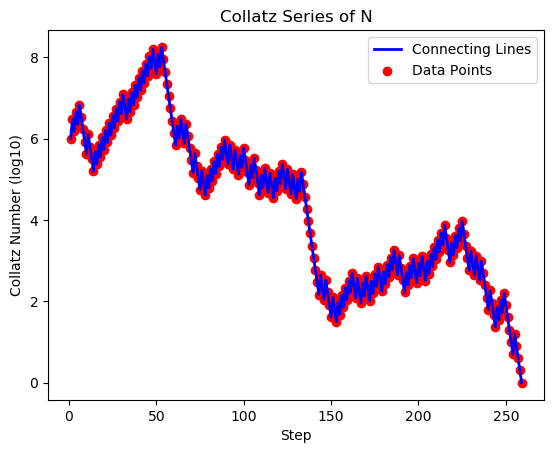

In [51]:
# the following calculates the Collatz Series and plots the intermediate steps until convergence for a given number N

def collatz(n):
    sequence = [n]
    s = 0
    while(n != 1):
        if (n % 2 == 0):
            n = n // 2
        else:
            n = 3*n + 1
        sequence.append(n)
        s += 1
    #return ", ".join([str(x) for x in sequence])
    return sequence


import matplotlib.pyplot as plt
import math 

n = 1000023
y = [math.log10(x) for x in collatz(n)]
x = list(range(1, len(y) + 1))

plt.scatter(x, y, color='red', label='Data Points')

# Connect the points with lines
plt.plot(x, y, color='blue', linestyle='-', linewidth=2, label='Connecting Lines')

# Set labels and title
plt.xlabel('Step')
plt.ylabel('Collatz Number (log10)')
plt.title('Collatz Series of N')

# Show legend
plt.legend()


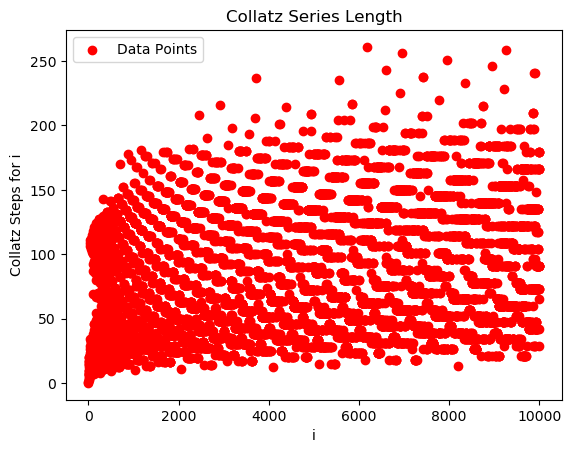

In [61]:
# The following applies the Collatz function on a series of 
# numbers i from 1 up to N and then plots the number of steps S against i

def collatz(n):
    sequence = [n]
    s = 0
    while(n != 1):
        if (n % 2 == 0):
            n = n // 2
        else:
            n = 3*n + 1
        sequence.append(n)
        s += 1
    #return ", ".join([str(x) for x in sequence])
    return s

def scollatz(n):
    S = {}
    for i in range(1, n+1):
        S[i] = collatz(i)
    return list(S.values())


import matplotlib.pyplot as plt
import math 

n = 10000
y = scollatz(n)
x = list(range(1, n+1))

plt.scatter(x, y, color='red', label='Data Points')

# Connect the points with lines
#plt.plot(x, y, color='blue', linestyle='-', linewidth=2, label='Connecting Lines')

# Set labels and title
plt.xlabel('i')
plt.ylabel('Collatz Steps for i')
plt.title('Collatz Series Length')

# Show legend
plt.legend()
